# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [3]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Medicamento y dolor de cabeza
Las probabilidades se obtuvieron al introducir los valores de n= 6 y p = 0.167.
+ En una prueba del fármaco Lipitor, el 16.7% de los sujetos tratados con 10 mg de atorvastatin tuvieron dolor de cabeza (según datos de Parke-Davis). 
+ En cada caso, suponga que se selecciona a 6 sujetos al azar, los cuales fueron tratados con 10 mg de atorvastatin, y calcule la probabilidad indicada.
    + Calcule las probabilidades de que de 1 a 6 sujetos tengan dolor de cabeza.
    + Analice la distribución de probabilidades.
    + Determine la media, desviación y el intervalo de confianza.
+ Saque conclusiones de las observaciones e interpretaciones

### Parametros

In [16]:
# Definición de parámetros del problema
n = 6    # Número de personas de la muestra
p = 0.167   # Probabilidad de tener dolor de cabeza
x = [ x for x in range(n+1)] # x varia de 0 a 6

### Construcción de la distribución binomial

In [5]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

       p    x.p   xx.p  p-acu  p-acr
x                                   
0  0.334  0.000  0.000  0.334  1.000
1  0.402  0.402  0.402  0.736  0.666
2  0.201  0.403  0.806  0.937  0.264
3  0.054  0.162  0.485  0.991  0.063
4  0.008  0.032  0.130  0.999  0.009
5  0.001  0.003  0.016  1.000  0.001
6  0.000  0.000  0.001  1.000  0.000

Estadísticos:
Sumatoria de probabilidades: 1.0
Media y Esperanza          : 1.002
Varianza                   : 0.835
Desviación Estandard       : 0.914
Revisión de estadísticos por scipy:
mean: 1.00, var: 0.83, skew: 0.73, kurt: 0.20.


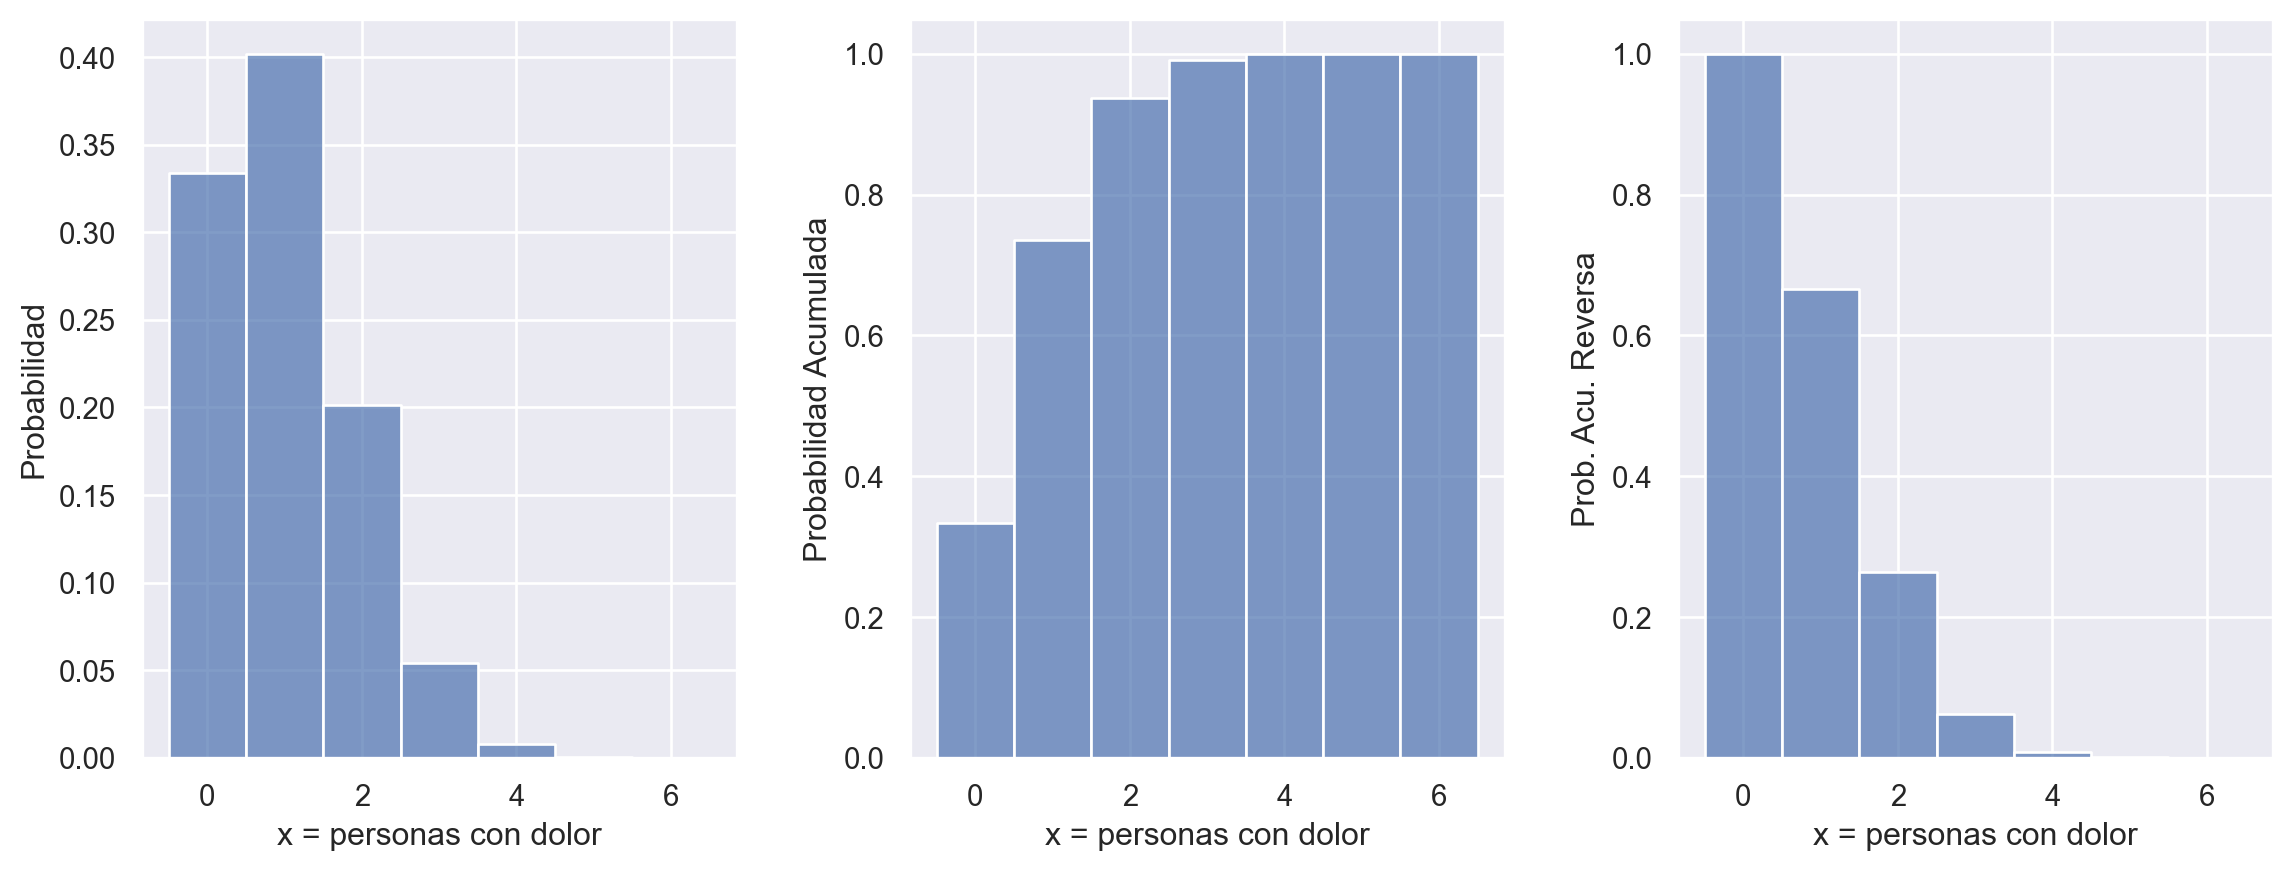

In [19]:
# Dataframe: Tabla de datos
df_miembros = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_miembros.round(3).set_index('x'))

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_miembros.p.sum()
media = df_miembros['x.p'].sum()
sum_xx_p = df_miembros['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(12, 5))
sf1, sf2, sf3 = f.subfigures(1, 3)

# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = personas con dolor", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización Probabilidad Acumulada
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Probabilidad Acumulada")
    .on(sf2)
    .plot()
)

# Visualización Probabilidad Acumulada en Reversa
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="p-acr")
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Prob. Acu. Reversa")
    .on(sf3)
    .plot()
)

##### Observaciones:
+ El numero de personas con dolor esperable es 1. (Esperanza: 1,002)
+ La distribución está sesgada a la derecha (sesgo positivo):
    + La probabilidad de personas con dolo disminuye cuanto mayor es la cantidad de personas evaludadas.
    + La desviación estandar indica que el desvío maximo es una persona es decir a lo sumo habrán entre cero y dos personas con dolor de cabeza.

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [7]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
Valor mínimo más común: -0.83 y Valor máximo más común: 2.83
Los valores más probables de x están entre -0.83 y 2.83
El valor más esperable es: 1.00


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que las personas con dolor de cabeza estén entre 0 y 3 personas máximo.
    + El 95% de los resultados más probables se encuentra sesgado a la izquierda:
        + Es más probable que exista una mayoría personas sin dolor de cabeza.
        + Es poco probable que este tipo medicina provoque dolor de cabeza. Pero es probable!
    + El 5% de los resultados menos probables se encuentra a la derecha:
        + Para mas de 4 personas o mas, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar existan 4 personas o más con dolor de cabeza.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

       p    x.p   xx.p  p-acu  p-acr
x                                   
0  0.334  0.000  0.000  0.334  1.000
1  0.402  0.402  0.402  0.736  0.666
2  0.201  0.403  0.806  0.937  0.264
3  0.054  0.162  0.485  0.991  0.063
4  0.008  0.032  0.130  0.999  0.009
5  0.001  0.003  0.016  1.000  0.001
6  0.000  0.000  0.001  1.000  0.000


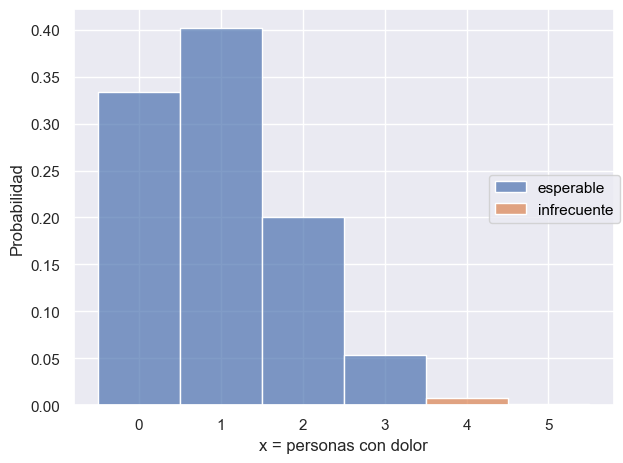

In [15]:
df_m = df_miembros.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i <= 3 else 'infrecuente' for i in df_miembros['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 4 o 5 o 6 de un grupo de 6 personas puedan tener dolor de cabeza.
    + La probabilidad acumulada (['p-acu'] ) aumenta pero es solo 2% para 6 o menos miembros.
        + Esta probabilidad se hace significativa (> 5% cuando x < 3)
    + La probabilidad acumulada invertida (['p-acu']) disminuye abruptamente a partir de 4 personas.
    + Se ve como al llegar a 3 miembros ya se cubre el 95% de los casos más probables.

### Analisis de riesgo
#### ¿4 personas o más con dolor implica riesgos de efectos no deseados?
+ ¿Que la probabilidad de provocar dolor sea significativa hasta 3 personas implica riesgo? 
+ ¿Que la probabilidad de provocar dolor en 4 o más personas sea infrecuente significa que no hay riesgo?

In [23]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
print(df_m[['p', 'p-acr','Miembros']].iloc[::-1])
print("Ver la tabla y la grafica de probabilidad acumulada reversa (de derecha a izquierda)")

       p  p-acr     Miembros
x                           
6  0.000  0.000  infrecuente
5  0.001  0.001  infrecuente
4  0.008  0.009  infrecuente
3  0.054  0.063    esperable
2  0.201  0.264    esperable
1  0.402  0.666    esperable
0  0.334  1.000    esperable
Ver la tabla y la grafica de probabilidad acumulada reversa (de derecha a izquierda)


**Observación**
Como se ve en la tabla y en la grafica la cantindad de personas con dolor esperable es no mayor a 3:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(3 o menos personas con dolor de cabeza de un total de 6) =
    + P(3 o 2 o 1 o 0) = 0.063
    + P(3) + P(2) + P(1) + P(0) = 1 - P(4) + P(5) + P(6) 
    + 1 + 0.666 + 0.264 + 0.001 + 0 + 0 + 0 + 0 =
    + P(3 o menos personas con dolor de cabeza de un total de 6) = **0.063**

**Interpretación**
+ **3** miembros es una cantidad esperable de miembros y no es un número excepcionalmente bajo.
+ Una selección y composición con 3 miembros como esta, **no implica necesariamente un medicamento con efectos no deseados**.
+ Una selección y composición con 3 miembros como esta, **si implica un riesgo para la salud que amerite evitar este medicamento**.

# Preguntas aisladas
#### Calcule la probabilidad de que al menos 5 sujetos tengan dolor de cabeza

In [14]:
n = 6  # Número de sujetos
p = 0.167  # Probabilidad de dolor de cabeza

probabilidad_al_menos_5 = 0

for x in range(n + 1):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_al_menos_5 += probabilidad_x

print(f"Probabilidad de al menos 5 sujetos con dolor de cabeza: {probabilidad_al_menos_5}")
print(f"Esta probabilidad debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de al menos 5 sujetos con dolor de cabeza: 1.0
Esta probabilidad debe coincidir con la que se calculó al construir la tabla.


__________________________________________________________________________________________________________________________